In [1]:


#1.유튜브 랭킹 데이터 수집



In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup

import time
import pandas as pd

In [3]:
browser = webdriver.Chrome(r'C:\Users\Gargantua\Desktop\files\chromedriver.exe')
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&sop=and&sst=subscriber_cnt&sod=desc&sfl=&stx=&sca=&page=1"
browser.get(url)

In [4]:
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

In [17]:
channel_list = soup.select('form > table > tbody > tr')

print(channel_list[0])

<tr class="">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203&amp;sst=subscriber_cnt&amp;sod=desc&amp;sop=and&amp;page=1"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AAUvwnjX42cdmywjVgTUFqMbiCEyKIhKgOMxV9ENLwd72w=s88-c-k-c0x00ffffff-no-rj-mo" src="https://yt3.ggpht.com/ytc/AAUvwnjX42cdmywjVgTUFqMbiCEyKIhKgOMxV9ENLwd72w=s88-c-k-c0x00ffffff-no-rj-mo"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203&amp;sst=subscriber_cnt&amp;sod=desc&amp;sop=and&amp;page=1">
								
								BLACKP

In [28]:
#카테고리 크롤링

category = channel_list[0].select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [33]:
#채널명 크롤링

title = channel_list[0].select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [35]:
#구독자 수, view 수, 동영상 수 크롤링

subscriber = channel_list[0].select('td.subscriber_cnt')[0].text.strip()
view = channel_list[0].select('td.view_cnt')[0].text.strip()
video = channel_list[0].select('td.video_cnt')[0].text.strip()

print(subscriber, view, video, sep = '\n')

5770만
152억6569만
337개


In [37]:
# 반복문을 이용해 전체 추출하기

for channel in channel_list:
    category = channel.select('p.category')[0].text.strip()
    title = channel.select('h1 > a')[0].text.strip()
    subscriber = channel.select('td.subscriber_cnt')[0].text.strip()
    view = channel.select('td.view_cnt')[0].text.strip()
    video = channel.select('td.video_cnt')[0].text.strip()
    
    print(category, title, subscriber, view, video)

[음악/댄스/가수] BLACKPINK 5770만 152억6569만 337개
[음악/댄스/가수] Big Hit Labels 5140만 147억6283만 529개
[음악/댄스/가수] BANGTANTV 4540만 69억5445만 1,419개
[키즈/어린이] Boram Tube Vlog [보람튜브 브이로그] 2650만 110억5288만 223개
[음악/댄스/가수] SMTOWN 2640만 198억2622만 3,657개
[음악/댄스/가수] 1MILLION Dance Studio 2340만 62억3498만 2,433개
[음악/댄스/가수] 1theK (원더케이) 2200만 190억3511만 14,021개
[음악/댄스/가수] JYP Entertainment 2000만 120억2834만 1,221개
[음악/댄스/가수] ArianaGrandeVevo 1810만 161억8752만 134개
[음악/댄스/가수] Mnet K-POP 1720만 114억0411만 22,746개
[음악/댄스/가수] JFlaMusic 1690만 32억4972만 276개
[미분류] NBA 1610만 81억2970만 34,875개
[TV/방송] KBS WORLD TV 1560만 112억6317만 49,540개
[음악/댄스/가수] officialpsy 1470만 82억4169만 90개
[음악/댄스/가수] BIGBANG 1330만 63억1446만 773개
[뉴스/정치/사회] CNN 1220만 93억6157만 150,779개
[음식/요리/레시피] Jane ASMR 제인 1190만 38억1776만 1,019개
[미분류] FC Barcelona 1110만 15억8387만 8,999개
[키즈/어린이] Nao FunFun 1090만 545만 82개
[음악/댄스/가수] TWICE 1010만 12억8637만 505개
[음악/댄스/가수] Stone Music Entertainment 951만 71억8554만 7,178개
[키즈/어린이] DuDuPopTOY 951만 41억6559만 1,600개
[TV/방송] MBCkpop 910만 

In [38]:

## format을 이용하여 여러 페이지 크롤링하기



In [39]:
##웹사이트주소 포매팅 해보기

page = 2
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&sop=and&sst=subscriber_cnt&sod=desc&sfl=&stx=&sca=&page={}".format(page)
browser.get(url)

In [40]:
page = 3
url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&sop=and&sst=subscriber_cnt&sod=desc&sfl=&stx=&sca=&page={page}"
browser.get(url)

In [45]:
##포매팅을 통한 자료 추출

from selenium import webdriver
from bs4 import BeautifulSoup

import pandas as pd


result = []

for page in range(1,11):
    url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&sop=and&sst=subscriber_cnt&sod=desc&sfl=&stx=&sca=&page={}".format(page)
    browser.get(url)
    time.sleep(2)
    
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    channel_list = soup.select('form > table > tbody > tr')
    
    for channel in channel_list:
        category = channel.select('p.category')[0].text.strip()
        title = channel.select('h1 > a')[0].text.strip()
        subscriber = channel.select('td.subscriber_cnt')[0].text.strip()
        view = channel.select('td.view_cnt')[0].text.strip()
        video = channel.select('td.video_cnt')[0].text.strip()
        
        data = [title, category, subscriber, view, video]
        result.append(data)
   

result_pd = pd.DataFrame(result)
result_pd.columns = ['title', 'category', 'subscriber', 'view', 'video']

result_pd.to_excel(r'C:\Users\Gargantua\Desktop\files\Youtube_Rank\rank.xlsx', index=False)


In [46]:


#2. 유튜브 랭킹 데이터 시각화하기

## 목표 : 구독자수를 카테고리별로 나누어 파이차트 구성하기



In [10]:
#데이터 불러오기

import pandas as pd
path = r'C:/Users/Gargantua/Desktop/files/Youtube_Rank/rank.xlsx'
df = pd.read_excel(path)

In [43]:
#matplotlib 추가 및 한글 깨짐 현상 방지코드
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('check your OS system')

In [35]:
#df 슬라이싱

platform.system()

#df['subscriber'][0:10]

'Windows'

In [14]:
#'만' 글자 대체하기

df['subscriber'].str.replace('만', '0000')[0:10]  #일부 row들을 대체할 수 있음을 확인함.

df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')  #새로운 column을 추가함

df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],5770만,152억8169만,337개,57700000
1,Big Hit Labels,[음악/댄스/가수],5150만,147억7827만,529개,51500000
2,BANGTANTV,[음악/댄스/가수],4550만,69억6979만,"1,426개",45500000
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000
4,SMTOWN,[음악/댄스/가수],2640만,198억3953만,"3,657개",26400000


In [16]:
#문자열을 숫자형으로 대체

df.info() #숫자들도 object형인 것을 확인(int 아님)

df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')

df.info() #'replaced_subscriber' 칼럼이 int형으로 바뀐 것을 확인함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
title                  1000 non-null object
category               1000 non-null object
subscriber             1000 non-null object
view                   1000 non-null object
video                  1000 non-null object
replaced_subscriber    1000 non-null object
dtypes: object(6)
memory usage: 47.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
title                  1000 non-null object
category               1000 non-null object
subscriber             1000 non-null object
view                   1000 non-null object
video                  1000 non-null object
replaced_subscriber    1000 non-null int32
dtypes: int32(1), object(5)
memory usage: 43.0+ KB


In [19]:
#카테고리별 구독자수, 채널 수 피봇 테이블 생성하기

pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum', 'count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],96000000,73
[IT/기술/컴퓨터],7310000,8
[TV/방송],214960000,151
[게임],71590000,87
[교육/강의],20450000,20


In [21]:
#피봇테이블의 칼럼, 인덱스 정리하기

pivot_df.columns = ['subscriber_sum', 'category_count']   #칼럼이름 변경
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],96000000,73
[IT/기술/컴퓨터],7310000,8
[TV/방송],214960000,151
[게임],71590000,87
[교육/강의],20450000,20


In [22]:
pivot_df = pivot_df.reset_index()    #칼럼 인덱스 초기화
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],96000000,73
1,[IT/기술/컴퓨터],7310000,8
2,[TV/방송],214960000,151
3,[게임],71590000,87
4,[교육/강의],20450000,20


In [24]:
pivot_df = pivot_df.sort_values(by = 'subscriber_sum', ascending = False)    #구독자수 내림차순 정렬
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],618850000,168
17,[키즈/어린이],247410000,91
2,[TV/방송],214960000,151
11,[음식/요리/레시피],157400000,81
7,[미분류],109500000,92


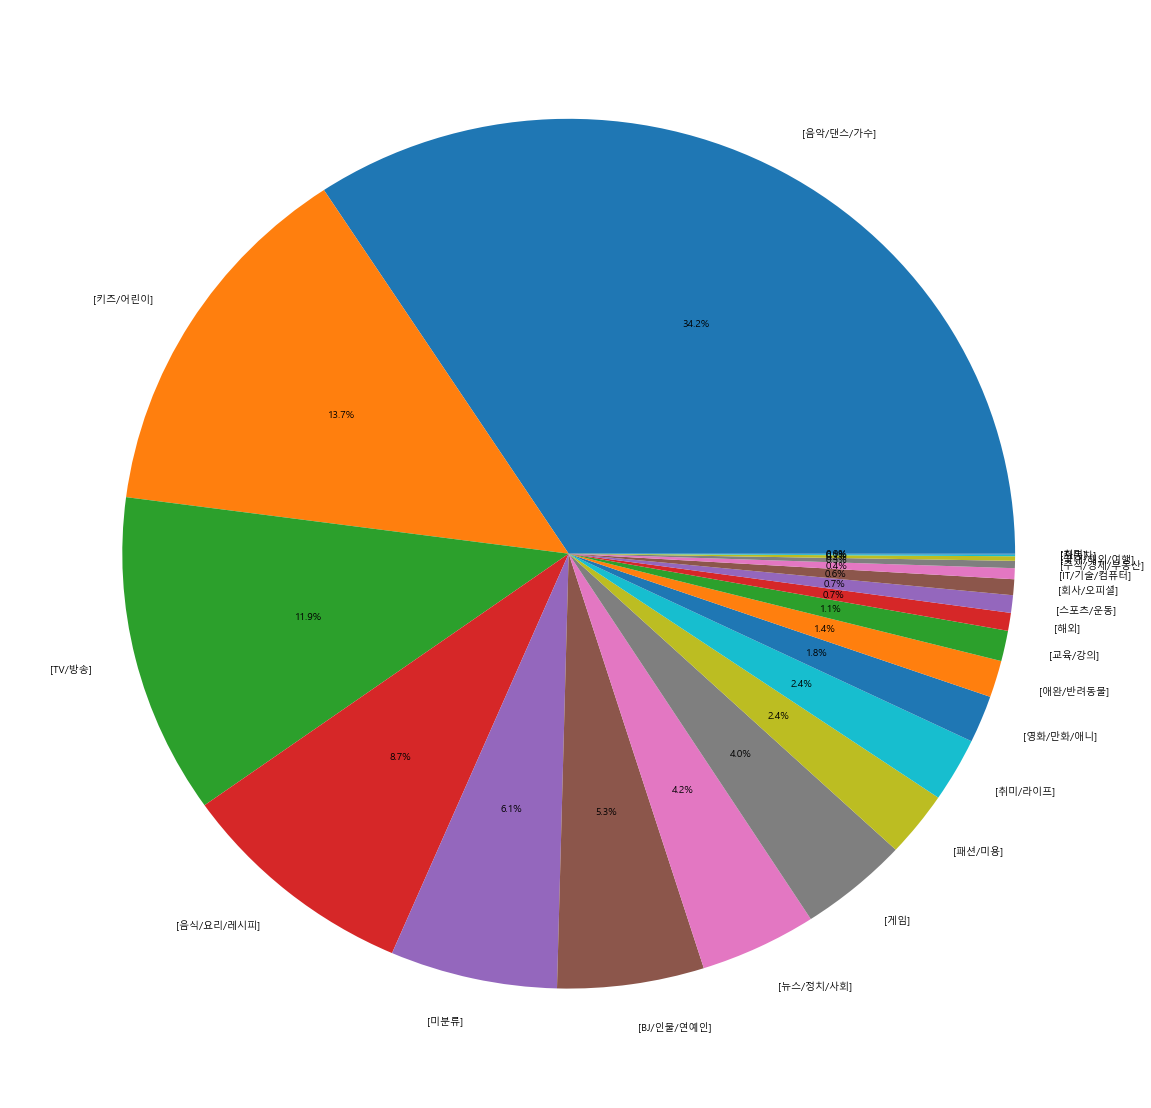

In [45]:
# 파이차트 만들기(구독자 수 기준)

plt.figure(figsize = (20,20))
plt.pie(pivot_df['subscriber_sum'], labels = pivot_df['category'], autopct = '%1.1f%%')
plt.show()

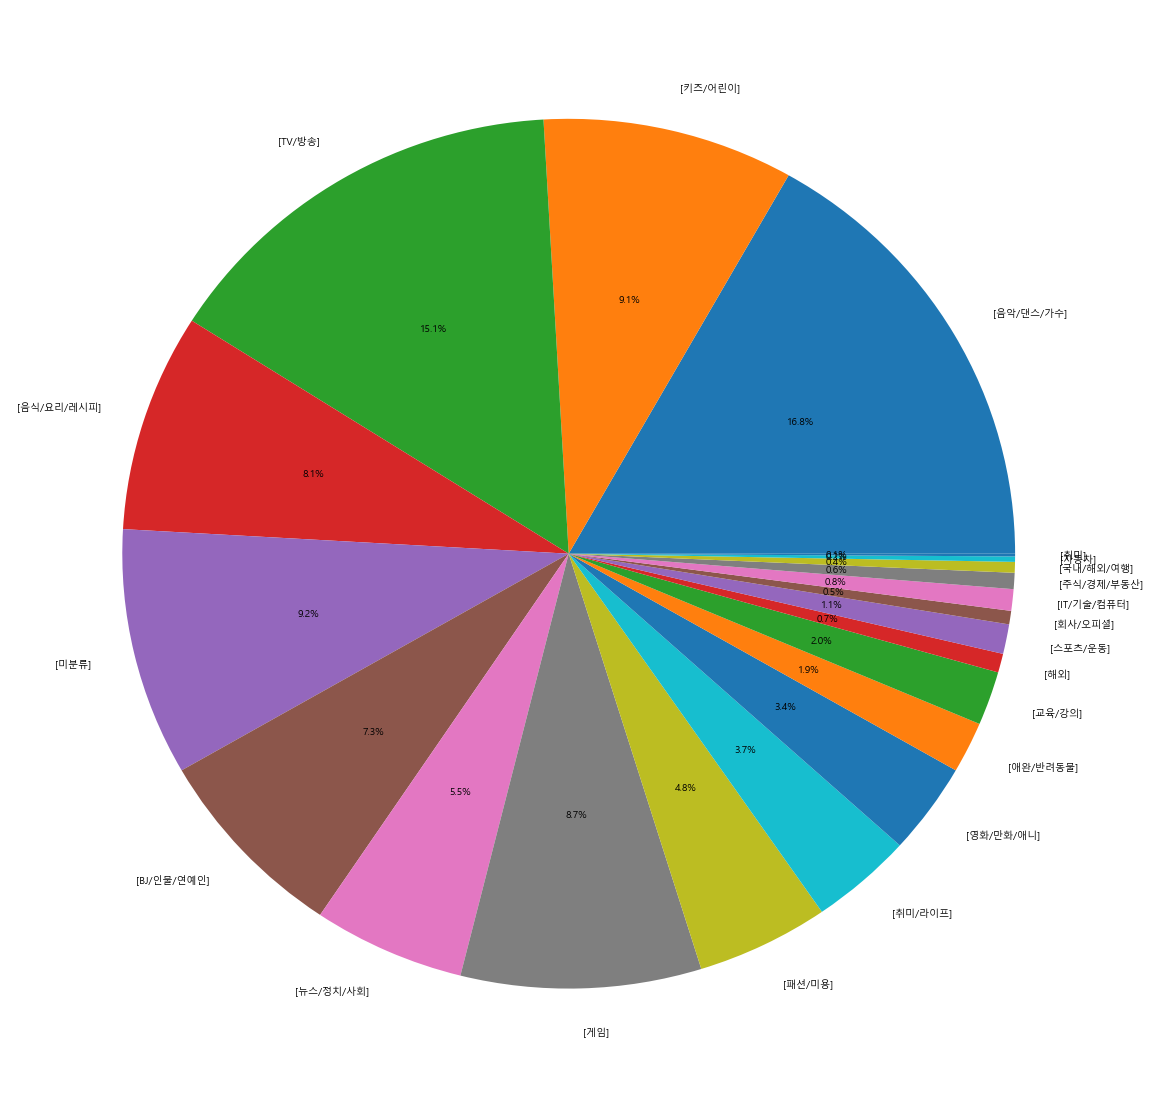

In [51]:
# 파이차트 만들기(카테고리 별 채널 수 기준)

plt.figure(figsize = (20,20))
plt.pie(pivot_df['category_count'], labels = pivot_df['category'], autopct = '%1.1f%%')
plt.show()